Karar Ağacı Başarısı: % 89.0
Rastgele Orman Başarısı: % 88.3


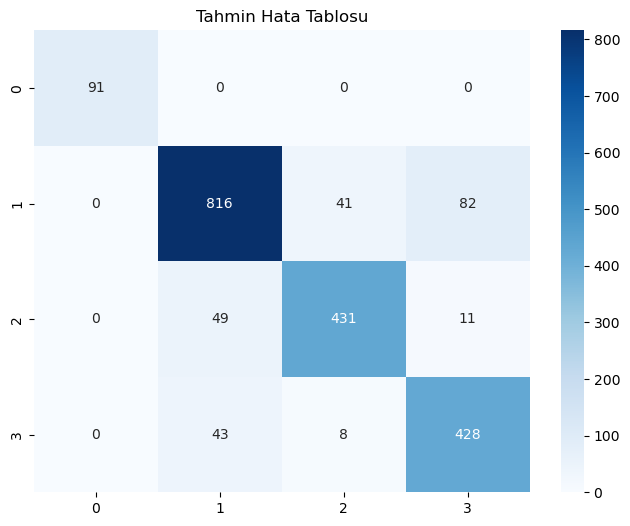

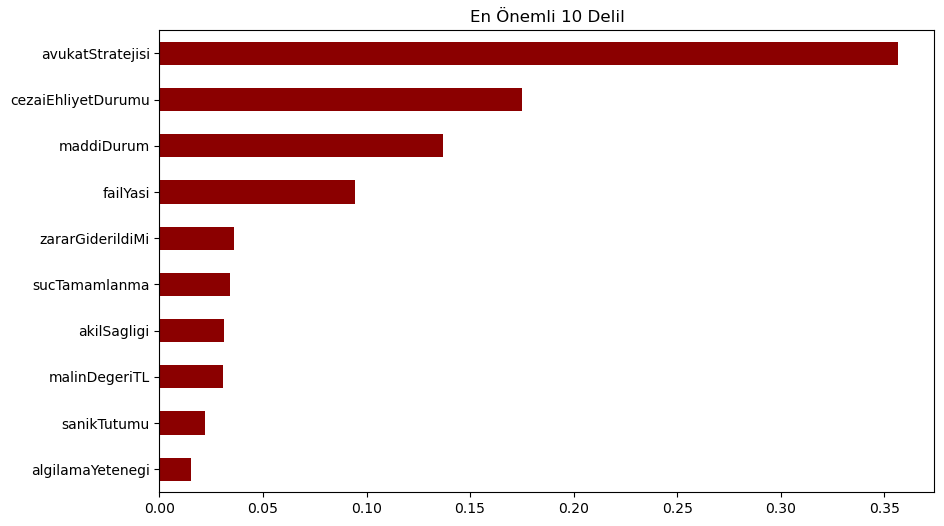

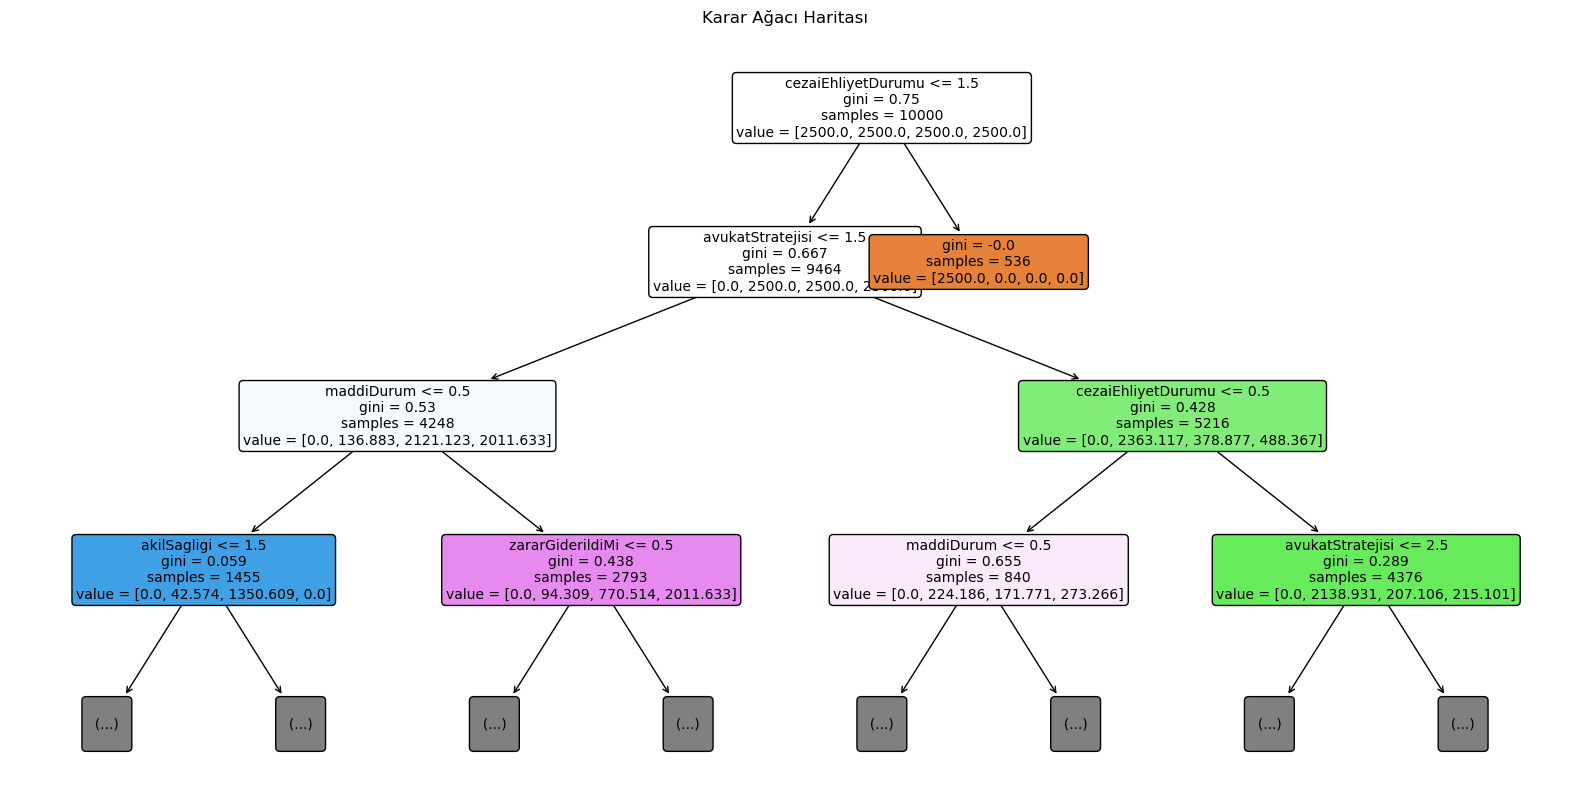


--- DETAYLI RAPOR ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       0.90      0.87      0.88       939
           2       0.90      0.88      0.89       491
           3       0.82      0.89      0.86       479

    accuracy                           0.88      2000
   macro avg       0.90      0.91      0.91      2000
weighted avg       0.88      0.88      0.88      2000



In [ ]:
# =============================================================================
# 1. BÖLÜM: KÜTÜPHANELER (Gerekli Araçlar)
# =============================================================================
import pandas as pd 


# KÜTÜPHANE: PANDAS (Veri İşleme Uzmanı)
# Bizim hirsizlikVeriSeti.csv dosyamız var ya? İşte Python'un o dosyayı
# açabilmesi, okuyabilmesi, içinden "hapisCezasiAy" sütununu silip atabilmesi için bu
# kütüphaneye muhtacız.
import numpy as np 


# KÜTÜPHANE: NUMPY (Matematik Uzmanı)
# Neden lazım? Arka planda sayıları, matrisleri (tabloları) ışık hızında çarpar, böler. Biz kodda
# doğrudan np ile çok iş yapmadık ama Pandas ve Sklearn çalışmak için arkada buna ihtiyaç
# duyar.


import matplotlib.pyplot as plt
# KÜTÜPHANE: MATPLOTLIB (Ressam - Temel Çizim)
# Neden lazım? Bize boş bir çizim kağıdı (plt.figure) açar. Grafiğe başlık (plt.title)
# atar. Sonunda da "Resmi Göster" (plt.show) der. O olmasa grafik çizemeyiz.
# pyplot nedir? Matplotlib kütüphanesinin içindeki "çizim yapan alt modül"dür.


import seaborn as sns 
# KÜTÜPHANE: SEABORN (Grafiker - Renkli Çizim)
# Neden lazım? Matplotlib biraz "kütük" gibidir, grafikleri çok sadedir. Seaborn ise o renkli,
# havalı Isı Haritasını (Heatmap) çizmemizi sağlar. Kodda sns.heatmap dediğimiz yer
# burasıdır.


# KÜTÜPHANE: SCIKIT-LEARN (Yapay Zeka Beyni)
# Burada direkt olarak import sklearn  yapmadık çünkü sklearn kütüphanesinin tamamını getirmek çok ağır olur
# Zaten bizimde hapsine ihtiyacımız yok 

from sklearn.tree import DecisionTreeClassifier       # Karar Ağacı Modeli
from sklearn.ensemble import RandomForestClassifier   # Rastgele Orman Modeli
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Puanlama Araçlarını getirir derstede gördüğümüz doğruluk matrisi ile elde ettiğimiz sonuçları burda göstereccez 
from sklearn.preprocessing import LabelEncoder        # Kelime-Sayı Çevirici  burda karar ağacı sayısal veri ile çalışır bizde burda kelimleri sayısal  veriye  çeviriyoruz "gece" ve "gündüz" 0 ile 1 e çevirmek gibi
from sklearn.tree import plot_tree                    # Ağaç Çizdirme Aracı kodun sonunda oluşan ağacı çizer 


# =============================================================================
# 2. BÖLÜM: VERİYİ YÜKLEME VE TEMİZLEME
# =============================================================================


# Kütüphane: PANDAS | Fonksiyon: read_csv()
# Görevi: .csv uzantılı dosyayı okuyup Excel tablosu gibi belleğe alır.
egitim_tablosu = pd.read_excel("trainProjeNew.xlsx")
test_tablosu = pd.read_excel("testProjeNew.xlsx")

egitim_tablosu = egitim_tablosu.drop(columns=['adliSicil'])
test_tablosu = test_tablosu.drop(columns=['adliSicil'])


# =============================================================================
# 3. BÖLÜM: ALTERNATİF KOLAY YÖNTEM (BİRLEŞTİR - ÇEVİR - AYIR)
# =============================================================================
# Bu yöntemle try-except karmaşasından kurtuluyoruz.


# 1. Eğitim ve Testi alt alta yapıştırıp 'TUM_VERI' yapıyoruz
# (Ayırırken karışmasın diye kaçıncı satırda kaldığımızı not alıyoruz)
egitim_uzunluk = len(egitim_tablosu) 
tum_veri = pd.concat([egitim_tablosu, test_tablosu], axis=0)

cevirici = LabelEncoder()

# Tek bir döngüyle hepsini çeviriyoruz (Senin istediğin mantık)
for sutun in tum_veri.columns:
    if tum_veri[sutun].dtype == 'object':
        # Bütün veriyi tek seferde öğrenip çeviriyoruz. 
        # Böylece "Elma" eğitimde de testte de aynı sayı oluyor.
        tum_veri[sutun] = cevirici.fit_transform(tum_veri[sutun])

# 2. Şimdi tekrar eski yerlerine ayırıyoruz
egitim_tablosu = tum_veri.iloc[:egitim_uzunluk].copy()
test_tablosu = tum_veri.iloc[egitim_uzunluk:].copy()



# =============================================================================
# 4. BÖLÜM: SORU VE CEVAP AYRIMI
# =============================================================================

# Kütüphane: PANDAS | Fonksiyon: drop()
# Görevi: 'cezaDurumu' hariç her şeyi alır (X = Sorular).
veriler_egitim = egitim_tablosu.drop(columns=['cezaDurumu'])
# Görevi: Sadece 'cezaDurumu'nu alır (y = Cevaplar).
sonuc_egitim = egitim_tablosu['cezaDurumu']

veriler_test = test_tablosu.drop(columns=['cezaDurumu'])
sonuc_test = test_tablosu['cezaDurumu']

# =============================================================================
# 5. BÖLÜM: MODELLERİ KURMA VE EĞİTME
# =============================================================================


# --- MODEL 1: KARAR AĞACI ---
# Kütüphane: SKLEARN (Tree) | Sınıf: DecisionTreeClassifier
# Görevi: Karar Ağacı yapısını oluşturur. max_depth=12 ile boyunu sınırlarız.
model_agac = DecisionTreeClassifier(max_depth=12,class_weight='balanced')

# Kütüphane: SKLEARN | Fonksiyon: fit()
# Görevi: EĞİTİM. Verileri (X) ve sonuçları (y) okuyarak kuralları öğrenir.
model_agac.fit(veriler_egitim, sonuc_egitim)


# --- MODEL 2: RASTGELE ORMAN ---
# Kütüphane: SKLEARN (Ensemble) | Sınıf: RandomForestClassifier
# Görevi: 100 tane ağaçtan oluşan orman yapısını kurar.
model_orman = RandomForestClassifier(n_estimators=100, max_depth=12,class_weight='balanced')

# Kütüphane: SKLEARN | Fonksiyon: fit()
# Görevi: EĞİTİM. Ormanı eğitir.
model_orman.fit(veriler_egitim,sonuc_egitim)

# =============================================================================
# 6. BÖLÜM: TAHMİN VE PUANLAMA
# =============================================================================

# Kütüphane: SKLEARN | Fonksiyon: predict()
# Görevi: SINAV. Hiç görmediği test sorularını çözer, tahmin üretir.
tahmin_agac = model_agac.predict(veriler_test)
tahmin_orman = model_orman.predict(veriler_test)

# Kütüphane: SKLEARN (Metrics) | Fonksiyon: accuracy_score()
# Görevi: Tahminlerle gerçek cevapları karşılaştırıp başarı yüzdesi (%99 gibi) verir.
basari_agac = accuracy_score(sonuc_test, tahmin_agac)
basari_orman = accuracy_score(sonuc_test, tahmin_orman)

print("Karar Ağacı Başarısı: %", round(basari_agac * 100, 2))
print("Rastgele Orman Başarısı: %", round(basari_orman * 100, 2))

# =============================================================================
# 7. BÖLÜM: GRAFİKLER (GÖRSELLEŞTİRME)
# =============================================================================

# --- GRAFİK 1: HATA MATRİSİ ---
# Kütüphane: MATPLOTLIB | Fonksiyon: figure()
# Görevi: Çizim yapılacak boş bir pencere açar (Boyut: 8x6).
plt.figure(figsize=(8, 6))

# Kütüphane: SKLEARN (Metrics) | Fonksiyon: confusion_matrix()
# Görevi: Hangi sınıfın hangisiyle karıştığını hesaplar.
cm = confusion_matrix(sonuc_test, tahmin_orman)

# Kütüphane: SEABORN | Fonksiyon: heatmap()

# Görevi: Hesaplanan matrisi renkli ısı haritası olarak çizer.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Kütüphane: MATPLOTLIB | Fonksiyon: title(), show()
plt.title('Tahmin Hata Tablosu')
plt.show()

# --- GRAFİK 2: ÖZELLİK ÖNEMİ ---
# Kütüphane: PANDAS | Sınıf: Series
# Görevi: Modelden gelen önem sayılarını ve sütun isimlerini birleştirir.
onemler = pd.Series(model_orman.feature_importances_, index=veriler_egitim.columns)

plt.figure(figsize=(10, 6))
# Kütüphane: PANDAS (Plotting) | Fonksiyon: plot()
# Görevi: En büyük 10 değeri bulup çubuk grafiği (barh) çizer.
onemler.nlargest(10).sort_values().plot(kind='barh', color='darkred')
plt.title('En Önemli 10 Delil')
plt.show()

# --- GRAFİK 3: AĞAÇ YAPISI ---
plt.figure(figsize=(20, 10))

# Kütüphane: SKLEARN (Tree) | Fonksiyon: plot_tree()
# Görevi: Karar ağacının dallarını ve yapraklarını resim olarak çizer.
plot_tree(model_agac, max_depth=3, feature_names=veriler_egitim.columns, filled=True, rounded=True, fontsize=10)
plt.title("Karar Ağacı Haritası")
plt.show()

# =============================================================================
# 8. BÖLÜM: DETAYLI RAPOR
# =============================================================================

print("\n--- DETAYLI RAPOR ---")
# Kütüphane: SKLEARN (Metrics) | Fonksiyon: classification_report()
# Görevi: Her ceza türü için ayrı ayrı Keskinlik, Yakalama ve Başarı puanı hesaplar.
print(classification_report(sonuc_test, tahmin_orman))